In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Loading data 

In [2]:
os.chdir('..')

In [3]:
data = pd.read_parquet(os.path.join(os.getcwd(), 'data','validationModelData', 'randomTestTrainSplit100.parquet'))

In [4]:
best = data.groupby(["GROUP","FEATURE","MASK"], as_index = False)\
           .mean()\
           .round(3)\
           .nlargest(16,"AUC")\
           .reset_index(drop = True)

In [5]:
best["MASK"].value_counts(normalize= True)

2    0.3750
1    0.3125
3    0.1875
4    0.1250
Name: MASK, dtype: float64

In [6]:
best["FEATURE"].value_counts()/4

Kurtosis             1.00
Entropy              1.00
Busyness             0.50
SumEntropy           0.50
JointAverage         0.25
Skewness             0.25
SumAverage           0.25
DependenceEntropy    0.25
Name: FEATURE, dtype: float64

In [7]:
best["GROUP"].value_counts(normalize=True)

FO       0.5625
GLCM     0.2500
NGTDM    0.1250
GLDM     0.0625
Name: GROUP, dtype: float64

In [8]:
cols = ["MASK", "FEATURE" , "GROUP","AUC"]
best.sort_values(by = cols)\
    .filter(cols)\
    .reset_index(drop = True)

,MASK,FEATURE,GROUP,AUC
0,1,Busyness,NGTDM,0.762
1,1,Entropy,FO,0.729
2,1,JointAverage,GLCM,0.731
3,1,Kurtosis,FO,0.729
4,1,SumAverage,GLCM,0.730
5,2,Busyness,NGTDM,0.776
6,2,DependenceEntropy,GLDM,0.742
7,2,Entropy,FO,0.738
8,2,Kurtosis,FO,0.756
9,2,Skewness,FO,0.749


In [9]:
best_features = best["FEATURE"].unique()

cond = data["FEATURE"].apply(lambda x: True if x in best_features else False)
plot_data = data[cond].sort_values(by = "GROUP")

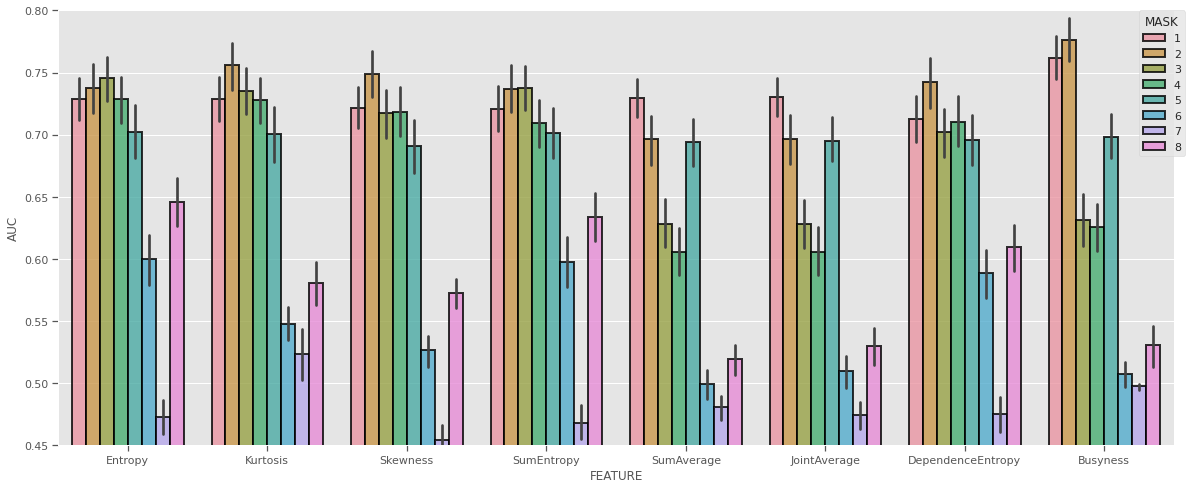

In [10]:
plt.figure(figsize= (20,8))
g = sns.barplot(data = plot_data, 
                x="FEATURE", 
                y="AUC", 
                hue="MASK",
                edgecolor=(0,0,0),
                linewidth=2,
                alpha=.8)
g.set(ylim=(0.45, 0.8))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0).set_title('MASK')
plt.savefig(os.path.join(os.getcwd(), "figures", "model", "bestLogregFeatures.png"),format = "png")
plt.show()